In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import utils
import numpy as np
from subprocess import call

# Experimento 1

Buscamos determinar, para knn solo, el valor optimo de k respecto a su performance (de acuerdo a distintas metricas). Fijamos k-fold en 5. Es decir que en cada iteracion habra un 80% de entrenamiento y un 20% de test

In [50]:
X = [i for i in range(1,272)] + [i for i in range(277,400, 5)]
for k in X:
    call(['../src/main', '-m', str(2), '-i', '../tests/catedra/testFullBig.in', '-o', '../tests/exp1/resultk{}'.format(k), '-knn-k', str(k), '-k-folds', str(5)])

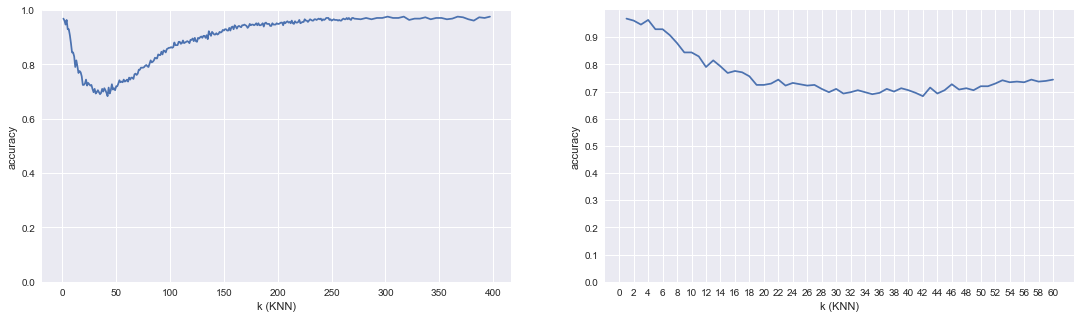

In [71]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.subplot(121)
plt.plot(X, [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')

plt.subplot(122)
plt.plot(X[:60], [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X[:60]])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
plt.xticks(range(0, 62,2))
plt.yticks(np.arange(0, 1, step=0.1))
plt.savefig('variandok-accuracy.png')
plt.show()

In [60]:
def getPrecisionReCall(k):
    matrices = utils.generateConfM('../tests/exp1/resultk{}.conf'.format(k))
    sumprecision = 0 
    sumrecall = 0 
    cant = 0
    for matriz in matrices:
        for posclass in range(41):
            sumprecision += matriz.precision(positive_class=posclass)
            sumrecall += matriz.recall(positive_class=posclass)
            cant += 1
    return (sumprecision/cant, sumrecall/cant)

precision = []
recall = []
for k in X:
    res = getPrecisionReCall(k)
    precision.append(res[0])
    recall.append(res[1]) 

41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 4

41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41


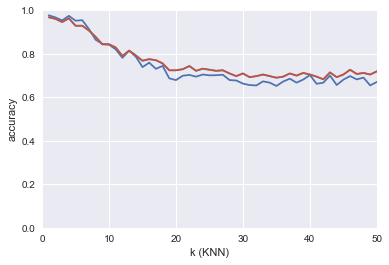

In [70]:
# fig = plt.gcf()
# fig.set_size_inches(18.5, 5)
# plt.subplot(121)
plt.plot(X, [precision[i] for i in range(len(X))])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
# plt.subplot(122)
plt.plot(X, [recall[i] for i in range(len(X))])
plt.xlim(0,50)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
plt.plot(X, [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X])

# plt.xticks(range(0, 62,2))
# plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

# Experimento 2

Medimos tiempos para distintos knn